# 导入第三方库

In [3]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import Counter

# 数据输入和准备

In [4]:
df=pd.read_csv("sintax_rdp.fixed.txt",sep="\t")
sample = df[["OTUID","label3"]]

import re
alldata = pd.DataFrame() 
for i in range(len(np.array(sample)[:,1])):
    result = re.split(",|:", np.array(sample)[:,1][i])
    result = [i.replace('"', '') for i in result]
    alldata = pd.DataFrame(pd.concat([alldata,np.transpose(pd.DataFrame(result))],axis=0))
alldata.index = sample["OTUID"]

In [5]:
alldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
OTUID,,,,,,,,,,,,,,
Otu1,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri
Otu3,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,s,Bacteroides_plebeius
Otu2,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,NaN,NaN
Otu4,d,Bacteria,p,Firmicutes,c,Clostridia,o,Clostridiales,f,Ruminococcaceae,g,Faecalibacterium,s,Faecalibacterium_prausnitzii
Otu5,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri


In [6]:
alldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
OTUID,,,,,,,,,,,,,,
Otu1,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri
Otu3,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,s,Bacteroides_plebeius
Otu2,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,NaN,NaN
Otu4,d,Bacteria,p,Firmicutes,c,Clostridia,o,Clostridiales,f,Ruminococcaceae,g,Faecalibacterium,s,Faecalibacterium_prausnitzii
Otu5,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri


In [7]:
all_sample = alldata.iloc[:,np.arange(1,14,2)]
all_sample.columns = ["Kingdom","Phylum","Class","Order","Family","Genus","Species"]
all_sample.head()
# all_sample.to_csv("all_data_wuzhongxinxi.csv",index=1)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTUID,,,,,,,
Otu1,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_copri
Otu3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_plebeius
Otu2,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
Otu4,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,Faecalibacterium_prausnitzii
Otu5,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_copri


In [8]:
otu_label = pd.read_csv("otutab_all.csv",header=0,index_col=0)
label = otu_label["label"]
otu = otu_label.drop(["label"],axis=1)
otu_label

,label,Otu133,Otu2,Otu159,Otu138,Otu37,Otu13,Otu26,Otu617,Otu60,...,Otu5733,Otu5119,Otu6566,Otu5946,Otu5031,Otu7319,Otu6433,Otu5618,Otu4254,Otu7230
CR001,CR,13394,2441,5155,229,238,907,1414,11,109,...,0,0,0,0,0,0,0,0,0,0
CR002,CR,59,5543,84,23,316,260,1008,6,124,...,0,0,0,0,0,0,0,0,0,0
CR003,CR,310,2192,202,30,342,1102,324,14,156,...,0,0,0,0,0,0,0,0,0,0
CR004,CR,298,917,62,53,80,218,156,10,102,...,0,0,0,0,0,0,0,0,0,0
CR005,CR,343,2414,348,44,104,141,274,60,1849,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,XR,0,1793,1,30,60,74,379,13,13,...,16,16,8,12,19,3,1,0,0,0
XRK02,XR,0,255,0,1,13,30,6,2,0,...,0,1,0,0,0,1,4,10,0,0
XRK03,XR,0,9370,71,15,137,245,10,3,24,...,0,0,0,0,0,4,4,1,22,6
XRK04,XR,0,940,1,5,43,554,43,4,44,...,0,0,0,0,0,0,0,1,0,0


In [9]:
label[label=="CR"] = "5"
label[label=="JK"] = "1"
label[label=="XR"] = "2"
label[label=="FJ"] = "3"
label[label=="JZ"] = "4"

<ipython-input-9-ee6c6af1200e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="CR"] = "5"
<ipython-input-9-ee6c6af1200e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="JK"] = "1"
<ipython-input-9-ee6c6af1200e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="XR"] = "2"
<ipython-input-9-ee6c6af1200e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [10]:
Counter(label)

Counter({'5': 200, '3': 200, '1': 199, '4': 200, '2': 200})

In [11]:
map_otu = np.transpose(otu)
result_otu = pd.concat([all_sample["Genus"],map_otu],axis=1)
result_otu

,Genus,CR001,CR002,CR003,CR004,CR005,CR006,CR007,CR008,CR009,...,XRJ06,XRJ07,XRJ08,XRJ09,XRJ10,XRK01,XRK02,XRK03,XRK04,XRK05
Otu1,Prevotella,199,322,4817,306,159,167,579,458,512,...,1226,2101,2325,2497,3679,5064,8145,106,5182,465
Otu3,Bacteroides,1151,1075,4404,220,151,328,329,443,389,...,548,1161,2255,816,378,155,472,319,1,473
Otu2,Bacteroides,2441,5543,2192,917,2414,2999,7119,1888,3142,...,5288,5859,5204,6350,2436,1793,255,9370,940,1397
Otu4,Faecalibacterium,312,2690,1464,689,1323,1731,1521,520,2188,...,805,800,721,682,783,1271,1892,74,158,27
Otu5,Prevotella,473,66,1388,131,58,54,291,271,557,...,2084,5292,4162,2516,7475,35,112,37,9020,898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Otu7350,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Otu7348,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Otu7352,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Otu7353,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
filter_otu = result_otu[result_otu["Genus"].isnull()==False]
# 数据缩放
# 找到数据中的numerical类型的特征。
otu = filter_otu.drop(["Genus"],axis=1)
numeric_cols = otu.columns[otu.dtypes != "object"]
numeric_col_sum =otu.loc[:,numeric_cols].sum()
otu.loc[:,numeric_cols] = otu.loc[:,numeric_cols]/numeric_col_sum*100
filter_otu_otu = pd.concat([filter_otu["Genus"],otu],axis=1)
filter_otu_otu
# 按属求和
ge_list = list(filter_otu_otu["Genus"])
temp1 = list(set(ge_list))
temp1.sort(key=ge_list.index)
genus = pd.DataFrame(index=temp1,columns=otu.columns)
for i in range(len(temp1)):
    temp2 = filter_otu_otu[filter_otu_otu["Genus"]==temp1[i]].drop(["Genus"],axis=1).sum(axis=0)
    genus.iloc[i,:] = temp2
genus

,CR001,CR002,CR003,CR004,CR005,CR006,CR007,CR008,CR009,CR010,...,XRJ06,XRJ07,XRJ08,XRJ09,XRJ10,XRK01,XRK02,XRK03,XRK04,XRK05
Prevotella,3.01622,2.6738,23.3536,4.54174,2.00119,1.84947,20.4312,20.7019,9.96836,7.2952,...,19.5608,29.6835,30.0236,20.1384,55.8884,22.9759,67.7926,1.53362,81.6777,9.95451
Bacteroides,27.9373,44.2916,40.0743,16.2926,34.7515,37.1996,34.3222,22.1378,28.1312,40.0948,...,40.5733,43.4183,40.4314,43.851,18.1276,15.6457,3.48982,74.5575,7.33745,35.6062
Faecalibacterium,2.42876,30.6856,9.23925,8.72493,6.09527,17.11,9.11047,4.05636,9.68433,13.6624,...,4.54988,4.07535,3.5614,4.44865,4.82509,10.9916,4.88068,8.23748,0.498828,1.04018
Escherichia/Shigella,1.46208,2.13686,1.60027,0.932836,2.41381,10.917,5.83586,2.70099,7.65129,17.9944,...,9.91373,1.81449,2.01101,3.51565,2.19586,17.334,0.0824367,1.13415,0.656576,0.557146
Fusobacterium,16.7142,0.789096,1.89061,2.37582,7.46149,0.581463,2.58843,5.47279,2.95488,0.236972,...,0.364083,1.09807,0.422424,0.694116,0.406559,0.0377977,7.94141,0.197442,0.739714,35.4835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Edwardsiella,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0204457
Sulfurimonas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allobaculum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nitrospira,0,0,0,0,0,0,0,0,0.00498293,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
genus = np.transpose(genus)
genus

,Prevotella,Bacteroides,Faecalibacterium,Escherichia/Shigella,Fusobacterium,Roseburia,Lachnospiracea_incertae_sedis,Phascolarctobacterium,Clostridium_XlVa,Parabacteroides,...,Thauera,Mucispirillum,Nautella,Alcanivorax,Negativicoccus,Edwardsiella,Sulfurimonas,Allobaculum,Nitrospira,Brachyspira
CR001,3.01622,27.9373,2.42876,1.46208,16.7142,0.951337,0.793512,3.22008,1.73608,3.0228,...,0,0,0,0,0,0,0,0,0,0
CR002,2.6738,44.2916,30.6856,2.13686,0.789096,1.19343,2.06948,2.34772,1.55211,2.53685,...,0,0,0,0,0,0,0,0,0,0
CR003,23.3536,40.0743,9.23925,1.60027,1.89061,2.2935,1.00608,3.86226,1.98064,2.44655,...,0,0,0,0,0,0,0,0,0,0
CR004,4.54174,16.2926,8.72493,0.932836,2.37582,2.00268,1.12815,1.25641,2.08722,2.56238,...,0,0,0,0,0,0,0,0,0,0
CR005,2.00119,34.7515,6.09527,2.41381,7.46149,3.63103,4.75197,0.72208,2.50092,4.66257,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,22.9759,15.6457,10.9916,17.334,0.0377977,3.48746,3.11453,0.97014,3.49502,1.93272,...,0,0,0,0,0,0,0,0,0,0
XRK02,67.7926,3.48982,4.88068,0.0824367,7.94141,0.293813,0.173329,2.87472,0.0739817,0.114143,...,0,0,0,0,0,0,0,0,0,0
XRK03,1.53362,74.5575,8.23748,1.13415,0.197442,0.413252,2.03182,0.0252543,0.51886,2.53231,...,0,0,0,0,0,0,0,0,0,0
XRK04,81.6777,7.33745,0.498828,0.656576,0.739714,0.398636,0.982733,0.0916649,0.473247,0.810062,...,0,0,0,0,0,0,0,0,0,0


In [14]:
arr_var = np.var(genus,axis=1)
arr_var

CR001     6.322832
CR002     9.231765
CR003     7.140401
CR004     2.932809
CR005     4.425030
           ...    
XRK01     3.893137
XRK02    15.136913
XRK03    17.825536
XRK04    21.268397
XRK05     8.402455
Length: 999, dtype: float64

Text(0, 0.5, 'raw_sample_var')

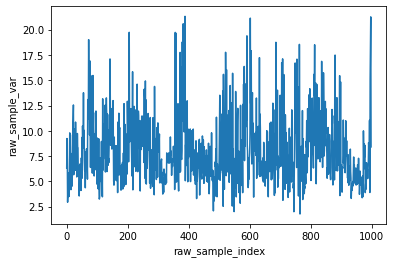

In [15]:
plt.plot(range(0,999),arr_var) 
plt.xlabel("raw_sample_index")
plt.ylabel("raw_sample_var")

# plt.savefig("test.svg", format="svg") #保存矢量图

In [16]:
arr_var[arr_var<=15]

CR001     6.322832
CR002     9.231765
CR003     7.140401
CR004     2.932809
CR005     4.425030
           ...    
XRJ08     8.116329
XRJ09     7.603178
XRJ10    11.030776
XRK01     3.893137
XRK05     8.402455
Length: 957, dtype: float64

Text(0, 0.5, 'filter_sample_var')

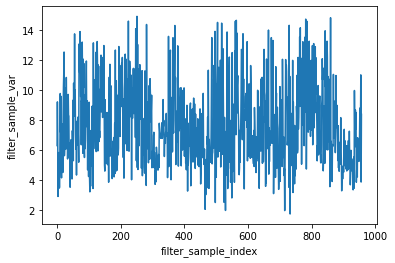

In [17]:
genus = genus[np.var(genus,axis=1)<=15]
arr_var = np.var(genus,axis=1)
plt.plot(range(0,len(arr_var)),arr_var) 
plt.xlabel("filter_sample_index")
plt.ylabel("filter_sample_var")

In [18]:
index = genus.index
label = label[label.index.isin(index)]

In [19]:
genus

,Prevotella,Bacteroides,Faecalibacterium,Escherichia/Shigella,Fusobacterium,Roseburia,Lachnospiracea_incertae_sedis,Phascolarctobacterium,Clostridium_XlVa,Parabacteroides,...,Thauera,Mucispirillum,Nautella,Alcanivorax,Negativicoccus,Edwardsiella,Sulfurimonas,Allobaculum,Nitrospira,Brachyspira
CR001,3.01622,27.9373,2.42876,1.46208,16.7142,0.951337,0.793512,3.22008,1.73608,3.0228,...,0,0,0,0,0,0,0,0,0,0
CR002,2.6738,44.2916,30.6856,2.13686,0.789096,1.19343,2.06948,2.34772,1.55211,2.53685,...,0,0,0,0,0,0,0,0,0,0
CR003,23.3536,40.0743,9.23925,1.60027,1.89061,2.2935,1.00608,3.86226,1.98064,2.44655,...,0,0,0,0,0,0,0,0,0,0
CR004,4.54174,16.2926,8.72493,0.932836,2.37582,2.00268,1.12815,1.25641,2.08722,2.56238,...,0,0,0,0,0,0,0,0,0,0
CR005,2.00119,34.7515,6.09527,2.41381,7.46149,3.63103,4.75197,0.72208,2.50092,4.66257,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRJ08,30.0236,40.4314,3.5614,2.01101,0.422424,2.81092,1.32569,0.867318,2.01326,2.94124,...,0,0,0,0,0.00224694,0,0,0,0,0
XRJ09,20.1384,43.851,4.44865,3.51565,0.694116,4.24583,2.03051,0.935253,1.72627,1.31161,...,0,0,0,0,0.00225362,0,0,0,0,0
XRJ10,55.8884,18.1276,4.82509,2.19586,0.406559,3.83327,1.54135,0.830988,1.27552,0.746102,...,0,0,0,0,0,0,0,0,0,0
XRK01,22.9759,15.6457,10.9916,17.334,0.0377977,3.48746,3.11453,0.97014,3.49502,1.93272,...,0,0,0,0,0,0,0,0,0,0


# 训练集和测试集划分

In [20]:
##---------训练集和测试集划分---------未考虑测序批次
#train
X = genus
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2050,shuffle=True)
X_train

,Prevotella,Bacteroides,Faecalibacterium,Escherichia/Shigella,Fusobacterium,Roseburia,Lachnospiracea_incertae_sedis,Phascolarctobacterium,Clostridium_XlVa,Parabacteroides,...,Thauera,Mucispirillum,Nautella,Alcanivorax,Negativicoccus,Edwardsiella,Sulfurimonas,Allobaculum,Nitrospira,Brachyspira
CRI07,1.97041,47.683,4.25953,0.414088,2.22398,8.48183,3.12195,2.33797,7.50012,4.31536,...,0,0,0,0,0,0,0,0,0,0
JK091,7.41896,24.1461,18.5038,0.43856,1.16387,4.09884,2.0691,0.26426,4.00326,3.2892,...,0,0,0,0.00281128,0,0,0,0,0,0
FJ066,5.65067,46.4588,5.66457,0.171443,3.06744,4.50154,1.48507,2.49288,1.01707,1.92758,...,0,0,0,0,0,0,0,0,0,0
CR032,9.63603,50.1515,14.1911,1.33515,1.30918,0.688133,7.95897,1.34813,1.92158,2.47555,...,0,0,0,0,0,0,0,0,0,0
JZ069,14.3551,48.0204,7.25442,1.7891,0.153733,1.59303,1.94506,0.933538,0.784261,0.846646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JZ067,29.8612,30.0852,10.9275,0.996383,3.15949,4.30522,1.3324,1.21573,2.20278,1.41407,...,0,0,0,0,0,0,0,0,0,0
XRJ02,26.0869,34.4071,9.46285,1.0193,0.654245,5.22922,3.33286,1.28716,2.31593,1.76836,...,0,0,0,0,0,0,0,0,0,0
FJ043,51.1649,23.8298,2.53143,0.401167,3.82074,2.28901,0.619985,3.37023,1.62398,1.18419,...,0,0,0,0,0,0,0,0,0,0
XRD03,12.0061,40.871,7.28531,2.41765,1.69808,6.19725,6.00802,0.438214,2.55957,2.16368,...,0,0,0,0,0,0,0,0,0,0


## 模型构建及参数调优 

模型一：随机森林

In [21]:
param = {
    'n_estimators':range(1,50,10),
    'max_features':range(1,40,1)
}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(random_state=2050),
                        param_grid = param,
                        cv=5,n_jobs=-1)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2050),
             n_jobs=-1,
             param_grid={'max_features': range(1, 40),
                         'n_estimators': range(1, 50, 10)})

In [22]:
best_estimator = gsearch1.best_estimator_
#best_estimator = RandomForestClassifier(max_features=8, n_estimators=750, random_state=2050)
print(f'best params:{gsearch1.best_params_}')
print('best accuracy:%f' % gsearch1.best_score_)
print(best_estimator)

best params:{'max_features': 17, 'n_estimators': 41}
best accuracy:0.739996
RandomForestClassifier(max_features=17, n_estimators=41, random_state=2050)


In [23]:
#对训练集进行交叉验证
scores = cross_val_score(best_estimator, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.74 (+/- 0.08)


In [24]:
scores

array([0.70149254, 0.70149254, 0.76865672, 0.73134328, 0.79699248])

In [25]:
#对测试集进行测试
best_estimator.fit(X_train,y_train)
#y_pred=best_estimator.predict_proba(X_test)
y_pred=best_estimator.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7430555555555556


In [26]:
y_train.value_counts()

3    145
2    136
1    133
5    133
4    122
Name: label, dtype: int64

In [27]:
y_test.value_counts()

4    68
5    62
1    59
2    55
3    44
Name: label, dtype: int64

In [28]:
y_test_pred=best_estimator.predict_proba(X_test)

In [29]:
alldata = pd.DataFrame(pd.concat([pd.DataFrame(y_test._stat_axis.values.tolist(),columns=['Sample']),
                             pd.DataFrame(y_test.values,columns=['True_label']),
                             pd.DataFrame(y_pred,columns=['Pred_label']),
                             pd.DataFrame(np.array(X_test),columns=X_test.columns)
                            ],axis=1))

In [30]:
# alldata.to_csv('alldata.csv',index=0)

In [31]:
importance = best_estimator.feature_importances_
feature_imp = pd.Series(importance,index=X_train.columns).sort_values(ascending=False)
feature_imp.head(22)

Porphyromonas                    0.038496
Romboutsia                       0.029915
Parvimonas                       0.027728
Odoribacter                      0.021254
Peptostreptococcus               0.017843
Gemella                          0.016181
Anaerotruncus                    0.015699
Alistipes                        0.015102
Bilophila                        0.014934
Eubacterium                      0.014171
Roseburia                        0.013954
Intestinibacter                  0.013647
Streptococcus                    0.013372
Fusicatenibacter                 0.013007
Flavonifractor                   0.012898
Clostridium_sensu_stricto        0.012615
Butyricicoccus                   0.012439
Proteus                          0.011639
Akkermansia                      0.011536
Lachnospiracea_incertae_sedis    0.011466
Holdemanella                     0.011043
Butyricimonas                    0.010868
dtype: float64

In [34]:
import scipy.stats as sns
#导入相应的模块
plt.figure(figsize=(8,4))
# sns.set_context(font_scale=1.5)
#设置字体大小为1.5倍
df = pd.DataFrame(genus[['Porphyromonas', 'Romboutsia', 'Parvimonas', 'Odoribacter','Peptostreptococcus']])
df.to_csv("df.csv")
df = pd.read_csv("df.csv",index_col=0)
OTU_xianggaung = df.corr("spearman")
OTU_xianggaung.to_csv("genus-xiangguang.csv")
# #读入数据
# g = sns.heatmap(df.corr("spearman"),vmin=-1,vmax=1,cmap=sns.color_palette('Pastel1_r',n_colors=128),annot=True, square=True)
# # #画热力图，图例最小值 -1，最大值1，颜色对象设为红蓝('RdBu'),颜色数目为128
# plt.savefig("genus-xianguan-retu.svg",format="svg")

<Figure size 576x288 with 0 Axes>

In [50]:
# filter_feature = feature_imp[feature_imp.values>0.011] 
# filter_feature = feature_imp[genus_list]
filter_feature = feature_imp.head(20)
filter_feature.index
# filter_feature.to_csv('filter_feature.csv',index=1)
# filter_feature = feature_imp
# filter_feature.to_csv('filter_feature.csv',index=1)

Index(['Porphyromonas', 'Romboutsia', 'Parvimonas', 'Odoribacter',
       'Peptostreptococcus', 'Gemella', 'Anaerotruncus', 'Alistipes',
       'Bilophila', 'Eubacterium', 'Roseburia', 'Intestinibacter',
       'Streptococcus', 'Fusicatenibacter', 'Flavonifractor',
       'Clostridium_sensu_stricto', 'Butyricicoccus', 'Proteus', 'Akkermansia',
       'Lachnospiracea_incertae_sedis'],
      dtype='object')

In [64]:
feature_imp.index

Index(['Porphyromonas', 'Romboutsia', 'Parvimonas', 'Odoribacter',
       'Peptostreptococcus', 'Gemella', 'Anaerotruncus', 'Alistipes',
       'Bilophila', 'Eubacterium',
       ...
       'Sulfurospirillum', 'Dyella', 'Roseivirga', 'Ochrobactrum',
       'Alteromonas', 'Rickettsia', 'Saccharospirillum', 'Frischella',
       'Thalassotalea', 'Mycobacterium'],
      dtype='object', length=315)

In [65]:
# genus_list = [i for i in input().split()]
# Alistipes
# Anaerostipes
# Bacteroides
# Barnesiella
# Blautia
# Clostridium_sensu_stricto
# Clostridium_XlVa
# Clostridium_XlVb
# Dialister
# Faecalibacterium
# Fusobacterium
# Lachnospiracea_incertae_sedis
# Parabacteroides
# Prevotella
# Romboutsia
# Roseburia
# Ruminococcus2

Alistipes Anaerostipes Bacteroides Barnesiella Blautia Clostridium_sensu_stricto Clostridium_XlVa Clostridium_XlVb Dialister Faecalibacterium Fusobacterium Lachnospiracea_incertae_sedis Parabacteroides Prevotella Romboutsia Roseburia Ruminococcus2


In [67]:
for i in genus_list:
    print(i,list(feature_imp.index).index(i))

Alistipes 7
Anaerostipes 36
Bacteroides 46
Barnesiella 25
Blautia 23
Clostridium_sensu_stricto 15
Clostridium_XlVa 40
Clostridium_XlVb 24
Dialister 37
Faecalibacterium 50
Fusobacterium 70
Lachnospiracea_incertae_sedis 19
Parabacteroides 53
Prevotella 28
Romboutsia 1
Roseburia 10
Ruminococcus2 59


In [ ]:
# a = list(filter_feature.index)
# b = set(a+genus_list)
# len(b)

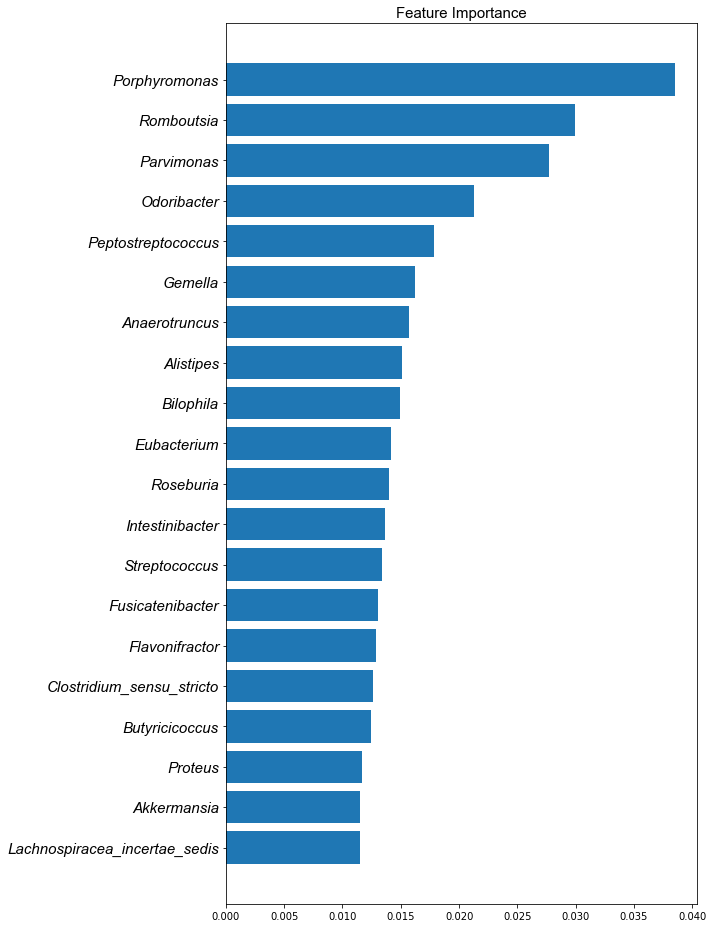

In [51]:
# plot feature importance
indices = np.argsort(filter_feature)
selectn = filter_feature.shape[0]
fig=plt.figure(figsize=(10,13))
ax=fig.add_subplot(111)
font1 = {'family':'Arial',
'weight' : 'normal',
'size'   : 15,
}

font2 = {'family':'Arial',
         'style':'italic',
'weight' : 'normal',
'size'   : 15,
}

ax.barh(range(selectn),filter_feature[indices])
ax.set_yticks(range(selectn))
ax.set_yticklabels(indices[::-1].index,fontdict=font2)
#ax.set_xlim(0, np.max(indices,)*1.1)
ax.set_title('Feature Importance',fontdict=font1)
plt.tight_layout()
plt.savefig("genus-feature_improtance.svg",format="svg")
plt.show()

# 模型评估

In [52]:
#混淆矩阵
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.71      0.75        59
           2       0.74      0.67      0.70        55
           3       0.52      0.75      0.62        44
           4       0.82      0.62      0.71        68
           5       0.85      0.97      0.90        62

    accuracy                           0.74       288
   macro avg       0.74      0.74      0.74       288
weighted avg       0.76      0.74      0.74       288



In [53]:
array_confusion = metrics.confusion_matrix(y_test, y_pred)
cm = array_confusion
array_confusion = array_confusion.T
array_confusion

array([[42,  3,  5,  3,  0],
       [ 6, 37,  3,  4,  0],
       [ 8, 13, 33,  9,  0],
       [ 3,  1,  3, 42,  2],
       [ 0,  1,  0, 10, 60]], dtype=int64)

In [54]:
cmap_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
             'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
             'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
             'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
             'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
             'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
             'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',
             'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
             'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
             'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
             'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 
             'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
             'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
             'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 
             'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 
             'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 
             'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 
             'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
             'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 
             'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
len(cmap_list)

164

In [55]:
con = cm.T/cm.sum(axis=1)
con.T*100

array([[71.18644068, 10.16949153, 13.55932203,  5.08474576,  0.        ],
       [ 5.45454545, 67.27272727, 23.63636364,  1.81818182,  1.81818182],
       [11.36363636,  6.81818182, 75.        ,  6.81818182,  0.        ],
       [ 4.41176471,  5.88235294, 13.23529412, 61.76470588, 14.70588235],
       [ 0.        ,  0.        ,  0.        ,  3.22580645, 96.77419355]])

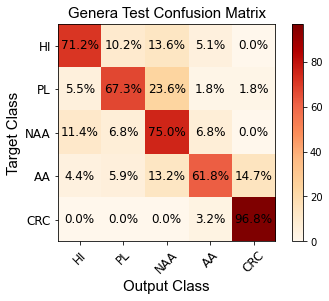

In [56]:
#绘制混淆矩阵图
def plot_confusion_matrix(cm,labels,cmap):
    font1 = {'family':'Arial',
    'weight' : 'normal',
    'size'   : 15,
    }
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=45,fontsize=12)
    plt.yticks(xlocations, labels,fontsize=12)
    plt.ylabel('Target Class',fontdict=font1)
    plt.xlabel('Output Class',fontdict=font1)
    plt.title("Genera Test Confusion Matrix",fontdict=font1)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        plt.text(x_val, y_val, "%0.1f%%" % (c,), color='black', fontsize=12, va='center', ha='center')
    plt.savefig("genus-confusion_matrix.svg",format="svg")
# labels = ['CR','FJ','JK','JZ','XR'] 
# labels = ['AA','CRC','HI','NAA','PL'] #五分类
labels = ['HI','PL','NAA','AA','CRC'] #五分类
# labels = ['JK','FJ','CR'] #三分类
plot_confusion_matrix(con.T*100,labels,"OrRd")

In [57]:
array_confusion

array([[42,  3,  5,  3,  0],
       [ 6, 37,  3,  4,  0],
       [ 8, 13, 33,  9,  0],
       [ 3,  1,  3, 42,  2],
       [ 0,  1,  0, 10, 60]], dtype=int64)

In [58]:
TP_0 = array_confusion[0,0]
FP_0 = sum(array_confusion[0,1:5])
FN_0 = sum(array_confusion[1:5,0])
TN_0 = sum(array_confusion[1,1:5]+array_confusion[2,1:5]+array_confusion[3,1:5]+array_confusion[4,1:5])-FN_0
# 输出肠癌的灵敏度和特异性
print('HI的灵敏度为：%.2f'%(TP_0/(TP_0+FN_0)))
print('HI的特异性为：%.2f'%(TN_0/(FP_0+TN_0)))

HI的灵敏度为：0.71
HI的特异性为：0.95


In [59]:
TP_1 = array_confusion[1,1]
FP_1 = array_confusion[1,0]+sum(array_confusion[1,2:5])
FN_1 = array_confusion[0,1]+sum(array_confusion[2:5,1])
TN_1 = sum(array_confusion[0,:5])+sum(array_confusion[2,:5])+sum(array_confusion[3,:5])+sum(array_confusion[4,:5])-FN_1
# 输出非进展的灵敏度和特异性
print('PL的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('PL的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

PL的灵敏度为：0.67
PL的特异性为：0.94


In [60]:
TP_1 = array_confusion[2,2]
FP_1 = sum(array_confusion[2,0:2])+sum(array_confusion[2,3:5])
FN_1 = sum(array_confusion[0:2,2])+sum(array_confusion[3:5,2])
TN_1 = sum(array_confusion[0,])+sum(array_confusion[1,])+sum(array_confusion[3,])+sum(array_confusion[4,])-FN_1
# 输出健康的灵敏度和特异性
print('NAA的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('NAA的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

NAA的灵敏度为：0.75
NAA的特异性为：0.88


In [61]:
TP_1 = array_confusion[3,3]
FP_1 = sum(array_confusion[3,0:3])+sum(array_confusion[3,4:5])
FN_1 = sum(array_confusion[0:3,3])+sum(array_confusion[4:5,3])
TN_1 = sum(array_confusion[0,])+sum(array_confusion[1,])+sum(array_confusion[2,])+sum(array_confusion[4,])-FN_1
# 输出进展的灵敏度和特异性
print('AA的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('AA的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

AA的灵敏度为：0.62
AA的特异性为：0.96


In [62]:
TP_1 = array_confusion[4,4]
FP_1 = sum(array_confusion[4,0:4])
FN_1 = sum(array_confusion[0:4,4])
TN_1 = sum(array_confusion[0,])+sum(array_confusion[1,])+sum(array_confusion[2,])+sum(array_confusion[3,])-FN_1
# 输出息肉的灵敏度和特异性
print('CRC的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('CRC的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

CRC的灵敏度为：0.97
CRC的特异性为：0.95
